In [1]:
import sys
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data1=loadmat('./data_matrix.mat')
data2=loadmat('./new_data_matrix.mat')

In [3]:
fit_data=data2['FIT_17']
pl_data=data1['Toread']
ripe_data=data2['RIPE_ATLAS']

In [4]:
flattened_fit = fit_data.flatten()
flattened_ripe = ripe_data.flatten()
flattened_pl = pl_data.flatten()

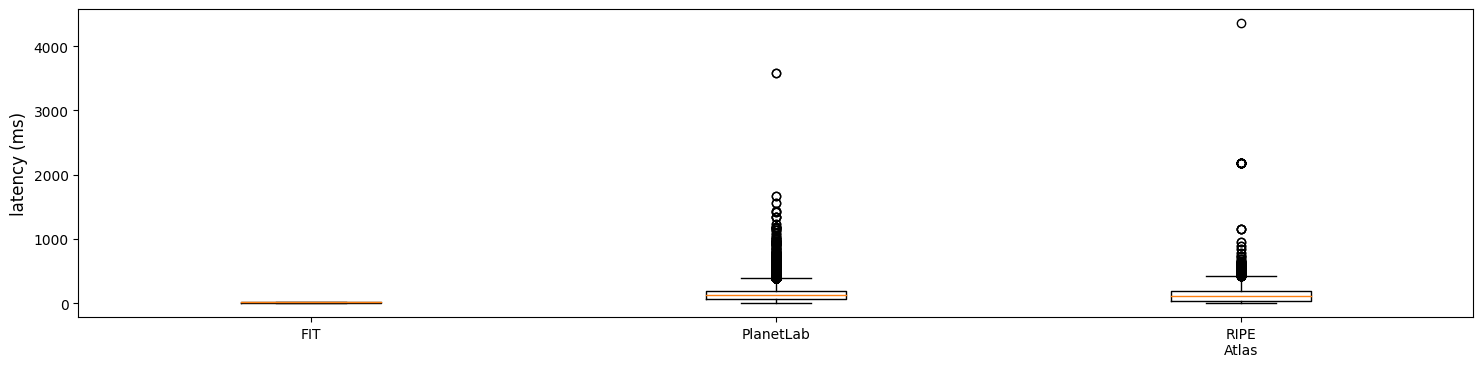

In [5]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

keys = ["PlanetLab", "FIT", "RIPE"]

latencies = {"FIT": flattened_fit, 
             "PlanetLab": flattened_pl,
            "RIPE Atlas": flattened_ripe}


# Extract the keys and values from the measurements dictionary
labels = latencies.keys()
values = latencies.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

In [6]:
percentiles = [1, 25, 50, 75, 90, 99]
value_dict = {}

for k, v in latencies.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval)
        values.append(perc)
    value_dict[k] = values

df = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(float)
df

,1,25,50,75,90,99
FIT,0.445000,0.715,10.538,11.178,11.586,14.583
PlanetLab,3.752568,57.452,118.830,188.540,256.870,409.800
RIPE Atlas,3.000000,38.000,112.000,194.000,259.000,372.000


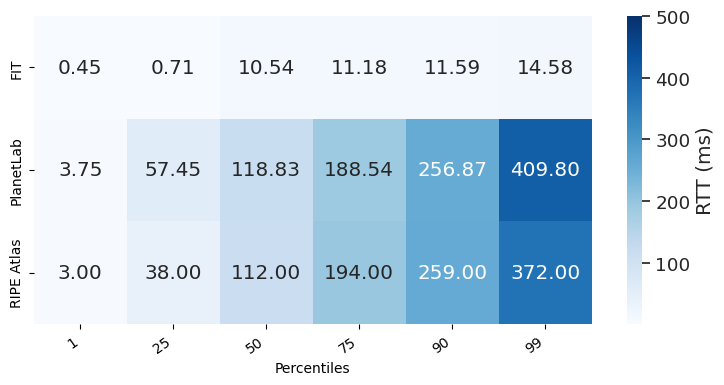

In [7]:
# create the heatmap
fig, ax = plt.subplots(figsize=(9, 4))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='Blues', vmax=500, cbar_kws={'label': 'RTT (ms)'}, cbar=True, fmt='.2f', ax=ax)

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
#plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
# plt.title("Latency ({0} ms)".format(waitTime))
plt.show()

In [8]:
flattened_fit = fit_data.flatten()
flattened_ripe = ripe_data.flatten()
flattened_pl = pl_data.flatten()

In [9]:
rtt_fit_count, rtt_fit_bins = np.histogram(flattened_fit, bins=1000) 
rtt_ripe_count, rtt_ripe_bins = np.histogram(flattened_ripe, bins=1000) 
rtt_pl_count, rtt_pl_bins = np.histogram(flattened_pl, bins=1000) 

In [10]:
rtt_pdf_fit = rtt_fit_count / sum(rtt_fit_count)
rtt_cdf_fit = np.cumsum(rtt_pdf_fit)
rtt_pdf_ripe = rtt_ripe_count / sum(rtt_ripe_count)
rtt_cdf_ripe = np.cumsum(rtt_pdf_ripe)
rtt_pdf_pl = rtt_pl_count / sum(rtt_pl_count)
rtt_cdf_pl = np.cumsum(rtt_pdf_pl)

In [11]:
fit_bins = (rtt_fit_bins[:-1] + rtt_fit_bins[1:])/2
pl_bins = (rtt_pl_bins[:-1] + rtt_pl_bins[1:])/2
ripe_bins = (rtt_ripe_bins[:-1] + rtt_ripe_bins[1:])/2

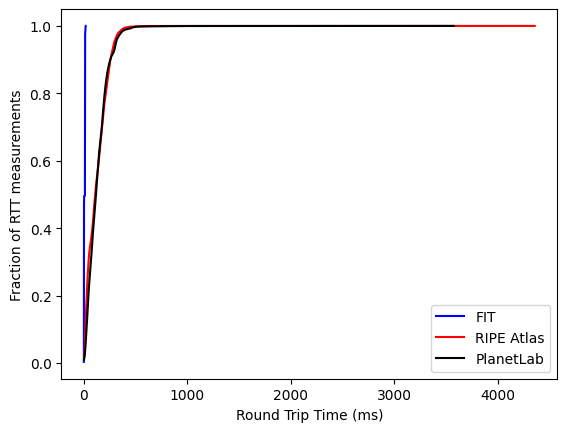

In [13]:
plt.style.use('default')
plt.plot(fit_bins, rtt_cdf_fit, color="blue", label="FIT") 
plt.plot(ripe_bins, rtt_cdf_ripe, color="red", label="RIPE Atlas") 
plt.plot(pl_bins, rtt_cdf_pl, color="black", label="PlanetLab") 
plt.legend() 
plt.xlabel("Round Trip Time (ms)")
plt.ylabel("Fraction of RTT measurements")
plt.show()

In [14]:
np.max(flattened_pl)

3575.1